In [1]:
import pandas as pd
import numpy as np
from scipy.stats import *
from framework.data import *
from framework.draw import *
from matplotlib import pyplot as plt

In [2]:
df = pd.read_sql('''
select distinct
*, substr(`Degree Date`, 7) as `Year`, `Risk-Adjusted Mortality Rate` as `Rate`
from
`nyse_licenses`,
`nyse_outcomes`
where`License No` = `NYS Physician License Number`;
''', sql)
df['Year'] = df['Year'][df['Year']!=' file'].astype(np.int64)
df = df.dropna(subset=['Year'])

In [33]:
# http://stackoverflow.com/questions/6260055/in-matplotlib-how-do-you-draw-r-style-axis-ticks-that-point-outward-from-the-ax

from matplotlib import rcParams
rcParams['xtick.direction'] = 'out'
rcParams['ytick.direction'] = 'out'

# http://stackoverflow.com/questions/3899980/how-to-change-the-font-size-on-a-matplotlib-plot
rcParams.update({'font.size': 18})

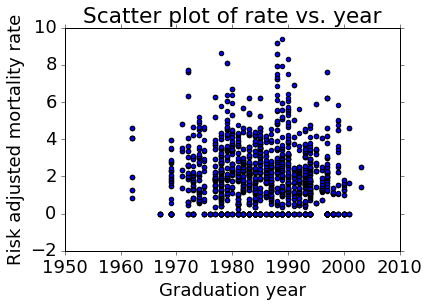

In [41]:
plt.clf()
plt.figure(figsize=(12,12))

df.plot(kind='scatter', x='Year', y='Rate')
plt.title('Scatter plot of rate vs. year')
plt.xlabel('Graduation year')
plt.ylabel('Risk adjusted mortality rate')

plt.savefig('cardiac_surgery_year_vs_mortality_rate.png', bbox_inches='tight', dpi=300)
plt.show()


In [32]:
# Added Ravi, 9/19/16
spearmanr(df['Year'], df['Rate'])

SpearmanrResult(correlation=-0.096185120008514632, pvalue=4.340388011156491e-05)

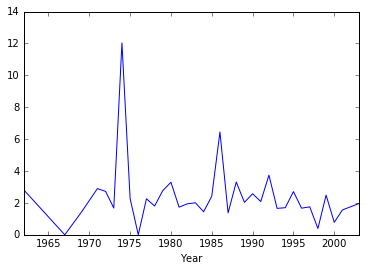

In [4]:
plt.clf()
df.groupby('Year')['Rate'].mean().plot()
plt.show()

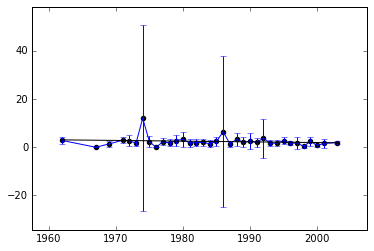

In [5]:
d = df.groupby('Year')['Rate'].agg({'mean': np.mean, 'std': np.std})
draw(kind='errorbar', x=np.array(d.index), y=np.array(d['mean']), yerr=np.array(d['std']))
draw(kind='linear_regression', x=np.array(d.index), y=np.array(d['mean']), c='#000000', show=True)

In [6]:
spearmanr(d.index, d['mean'])

SpearmanrResult(correlation=-0.16961972168495565, pvalue=0.32999558636082438)

In [7]:
df['Year'].value_counts().sort_index()

1962.0     12
1967.0      6
1969.0     38
1971.0     12
1972.0     40
1973.0     52
1974.0     54
1975.0     22
1976.0      6
1977.0     48
1978.0    106
1979.0     74
1980.0     60
1981.0     66
1982.0     70
1983.0    108
1984.0     89
1985.0     94
1986.0     49
1987.0     68
1988.0     73
1989.0     92
1990.0     98
1991.0     38
1992.0     60
1993.0     83
1994.0     83
1995.0     24
1996.0     28
1997.0     88
1998.0     24
1999.0     22
2000.0     22
2001.0      8
2003.0      4
Name: Year, dtype: int64

In [8]:
df = df.sort_values('Rate')[:-20]

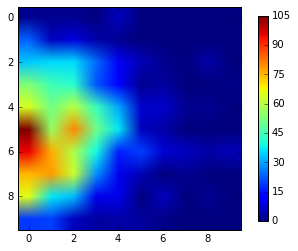

In [9]:
year = df['Year']
#years = np.array(year)[:, np.newaxis]
scores = df['Rate']
# plt.plot(years, scores, 'bo')
length = len(year)
x = year
y = scores

heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap)
plt.colorbar(shrink=.92)
# plt.axis([1965, 2010, 10, 90])
#plt.xlabel('Graduation year')
#plt.ylabel('Risk Adjusted Mortality Rate')
plt.axes().set_aspect('equal')

# plt.title('%s, N = %d', specialty, length)
plt.show()

In [19]:
pd.DataFrame(heatmap, index=xedges[1:], columns=yedges[1:])

,0.941,1.882,2.823,3.764,4.705,5.646,6.587,7.528,8.469,9.41
1966.1,2.0,2.0,2.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0
1970.2,23.0,6.0,9.0,4.0,2.0,0.0,0.0,0.0,0.0,0.0
1974.3,34.0,36.0,36.0,24.0,11.0,5.0,2.0,0.0,4.0,0.0
1978.4,53.0,45.0,42.0,22.0,13.0,2.0,3.0,0.0,0.0,1.0
1982.5,64.0,51.0,60.0,44.0,30.0,7.0,7.0,2.0,2.0,0.0
1986.6,105.0,56.0,80.0,51.0,37.0,6.0,4.0,0.0,0.0,0.0
1990.7,95.0,76.0,59.0,39.0,16.0,20.0,8.0,6.0,4.0,5.0
1994.8,75.0,78.0,62.0,28.0,10.0,5.0,0.0,2.0,0.0,0.0
1998.9,65.0,37.0,32.0,10.0,10.0,0.0,6.0,0.0,2.0,0.0
2003.0,19.0,20.0,6.0,3.0,4.0,3.0,1.0,0.0,0.0,0.0


In [27]:
df.ix[(df['Year'] > 1998.9)].count()

Date of Licensure                     56
Degree Date                           56
License No                            56
Medical School                        56
Name                                  56
Profession                            56
Registered through last day of        56
Status                                56
City                                  56
State                                 56
Physician Name                        56
NYS Physician License Number          56
Facility ID                           56
Hospital Name                         56
Detailed Region                       56
Region                                56
Procedure                             56
Year of Hospital Discharge            56
Number of Cases                       56
Number of Deaths                      56
Observed Mortality Rate               56
Expected Mortality Rate               56
Risk-Adjusted Mortality Rate          56
Lower Limit of Confidence Interval    56
Upper Limit of C

In [12]:
df.sort_values('Rate')[:-10]

,Date of Licensure,Degree Date,License No,Medical School,Name,Profession,Registered through last day of,Status,City,State,...,Number of Cases,Number of Deaths,Observed Mortality Rate,Expected Mortality Rate,Risk-Adjusted Mortality Rate,Lower Limit of Confidence Interval,Upper Limit of Confidence Interval,Comparison Results,Year,Rate
933,03/30/99,05/20/1993,213550,ALBANY MEDICAL COLLEGE,NABAGIEZ JOHN PAUL,MEDICINE,08/17,REGISTERED,STATEN ISLAND,NY,...,8.0,0.0,0.00,2.03,0.00,0.00,66.58,Rate not different than Statewide Rate,1993.0,0.00
1589,12/28/79,06/01/1973,140950,OHIO STATE UNIVERSITY,BENNETT EDWARD V JR,MEDICINE,06/17,REGISTERED,ALBANY,NY,...,52.0,0.0,0.00,1.18,0.00,0.00,8.74,Rate not different than Statewide Rate,1973.0,0.00
1320,06/19/86,06/04/1978,166401,UNIVERSITY OF ALABAMA,LANG SAMUEL J,MEDICINE,10/16,REGISTERED,FLUSHING,NY,...,6.0,0.0,0.00,2.45,0.00,0.00,36.58,Rate not different than Statewide Rate,1978.0,0.00
1319,06/19/86,06/04/1978,166401,UNIVERSITY OF ALABAMA,LANG SAMUEL J,MEDICINE,10/16,REGISTERED,FLUSHING,NY,...,12.0,0.0,0.00,2.20,0.00,0.00,34.77,Rate not different than Statewide Rate,1978.0,0.00
1314,10/12/90,05/23/1989,184274,CORNELL UNIV MEDICAL COLL,GIRARDI LEONARD NICK,MEDICINE,05/18,REGISTERED,NEW YORK,NY,...,224.0,0.0,0.00,1.42,0.00,0.00,1.68,Rate not different than Statewide Rate,1989.0,0.00
1312,05/24/85,05/25/1983,162167,UNIVERSITY OF CONNECTICUT,CIABURRI DANIEL GEORGE,MEDICINE,06/17,REGISTERED,NEW YORK,NY,...,1.0,0.0,0.00,0.94,0.00,0.00,100.00,Rate not different than Statewide Rate,1983.0,0.00
1311,05/24/85,05/25/1983,162167,UNIVERSITY OF CONNECTICUT,CIABURRI DANIEL GEORGE,MEDICINE,06/17,REGISTERED,NEW YORK,NY,...,6.0,0.0,0.00,2.70,0.00,0.00,56.65,Rate not different than Statewide Rate,1983.0,0.00
1310,11/14/95,05/19/1994,201405,COLUMBIA UNIVERSITY,CHEN JONATHAN MICHAEL,MEDICINE,,NOT REGISTERED,NEW YORK,NY,...,5.0,0.0,0.00,0.66,0.00,0.00,100.00,Rate not different than Statewide Rate,1994.0,0.00
1305,12/17/82,06/01/1980,152786,UNIVERSITY OF CHICAGO,RIBAKOVE GREG HOWARD,MEDICINE,09/18,REGISTERED,NEW YORK,NY,...,1.0,0.0,0.00,1.20,0.00,0.00,100.00,Rate not different than Statewide Rate,1980.0,0.00
1303,02/09/87,05/19/1985,169305,SUNY UPSTATE MED CTR,MOSCA RALPH SALVATORE,MEDICINE,12/17,REGISTERED,NEW YORK,NY,...,4.0,0.0,0.00,0.45,0.00,0.00,100.00,Rate not different than Statewide Rate,1985.0,0.00


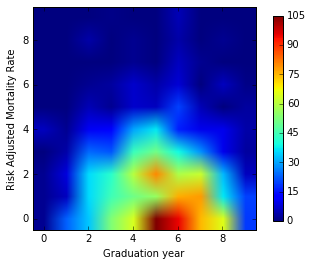

In [31]:
year = df['Year']
#years = np.array(year)[:, np.newaxis]
scores = df['Rate']
# plt.plot(years, scores, 'bo')
length = len(year)
x = year
y = scores

heatmap, xedges, yedges = np.histogram2d(x, y, bins=10)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]

plt.clf()
plt.imshow(heatmap.transpose(), origin='low')
plt.colorbar(shrink=.92)
# plt.axis([1965, 2010, 10, 90])
plt.xlabel('Graduation year')
plt.ylabel('Risk Adjusted Mortality Rate')
plt.axes().set_aspect('equal')

# plt.title('%s, N = %d', specialty, length)
plt.show()